In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxTimeVaryingFitter
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline


In [3]:
df = pd.read_csv('ready_for_modelling_long_form.csv')
df.head()

,neon_id,has_op_id,has_discourse_id,time_from_asmbly,age,gender,referral_source,family_membership,membership_cancelled,membership_type,...,cum_discourse_read_time,cum_skedda_booking_count,cum_num_classes_attended,cum_dollars_spent,cum_woodshop_classes,cum_metal_shop_classes,cum_electronics_classes,cum_textiles_classes,cum_lasers_classes,cum_3dp_classes
0,2742,True,True,1369.0,35.0,Male,Google,True,True,YEAR,...,246.0,0.0,4.0,1110.0,2.0,2.0,0.0,0.0,0.0,0.0
1,2837,False,True,1336.0,35.0,Male,Google,False,False,MONTH,...,3.0,2.0,1.0,175.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2837,False,True,1336.0,35.0,Male,Google,False,False,MONTH,...,10.0,12.0,2.0,280.0,0.0,2.0,0.0,0.0,0.0,0.0
3,2837,False,True,1336.0,35.0,Male,Google,False,False,MONTH,...,111.0,16.0,2.0,355.0,0.0,2.0,0.0,0.0,0.0,0.0
4,2837,False,True,1336.0,35.0,Male,Google,False,True,MONTH,...,111.0,16.0,2.0,430.0,0.0,2.0,0.0,0.0,0.0,0.0


For Cox PH analysis, we'll need to one hot encode the cateogrical variables, and min-max scale the 
continuous variables. The Lifelines documentation doesn't state whether variable scaling is handled
automatically, so we'll do it ourselves to be safe.

In [74]:
drop_cols = [
    "discourse_read_time",
    "change_discourse_read_time",
    "skedda_booking_count",
    "change_skedda_booking_count",
    "gender",
    "dollars_spent",
    "volunteer",
    "woodshop_classes",
    "metal_shop_classes",
    "textiles_classes",
    "electronics_classes",
    "lasers_classes",
    "3dp_classes",
    "cum_electronics_classes",
    "cum_skedda_booking_count",
    "cum_discourse_read_time",
    "cum_woodshop_classes",
    "cum_lasers_classes",
    "cum_textiles_classes",
    "cum_metal_shop_classes",
    "cum_3dp_classes",
    "cum_dollars_spent",
    
]

df.drop(columns=drop_cols, inplace=True)

In [4]:
df = pd.get_dummies(df)


In [5]:
ctv = CoxTimeVaryingFitter(penalizer=0.1)
ctv.fit(
    df,
    id_col="neon_id",
    event_col="membership_cancelled",
    start_col="start",
    stop_col="stop",
    show_progress=True
)

/Users/Matthew_1/opt/anaconda3/envs/AsmblyMakerspace/lib/python3.11/site-packages/lifelines/utils/__init__.py:1122: ConvergenceWarning: Column volunteer have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['membership_cancelled'].astype(bool)
>>> print(df.loc[events, 'volunteer'].var())
>>> print(df.loc[~events, 'volunteer'].var())

A very low variance means that the column volunteer completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)


Iteration 1: norm_delta = 3.62e-01, step_size = 0.9500, log_lik = -5145.80293, newton_decrement = 2.20e+02, seconds_since_start = 0.0
Iteration 2: norm_delta = 7.22e-02, step_size = 0.9500, log_lik = -4933.09299, newton_decrement = 1.79e+01, seconds_since_start = 0.1
Iteration 3: norm_delta = 2.74e-02, step_size = 0.9500, log_lik = -4913.23474, newton_decrement = 1.72e+00, seconds_since_start = 0.1
Iteration 4: norm_delta = 5.13e-03, step_size = 1.0000, log_lik = -4911.41647, newton_decrement = 4.28e-02, seconds_since_start = 0.1
Iteration 5: norm_delta = 9.62e-05, step_size = 1.0000, log_lik = -4911.37317, newton_decrement = 1.35e-05, seconds_since_start = 0.2
Iteration 6: norm_delta = 3.65e-08, step_size = 1.0000, log_lik = -4911.37315, newton_decrement = 1.68e-12, seconds_since_start = 0.3
Convergence completed after 6 iterations.


/Users/Matthew_1/opt/anaconda3/envs/AsmblyMakerspace/lib/python3.11/site-packages/lifelines/fitters/cox_time_varying_fitter.py:817: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.08075961624975646' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  baseline_hazard_.loc[t] = death_counts / hazards_at_t.sum()


<lifelines.CoxTimeVaryingFitter: fitted with 11073 periods, 1247 subjects, 793 events>

<Axes: xlabel='log(HR) (95% CI)'>

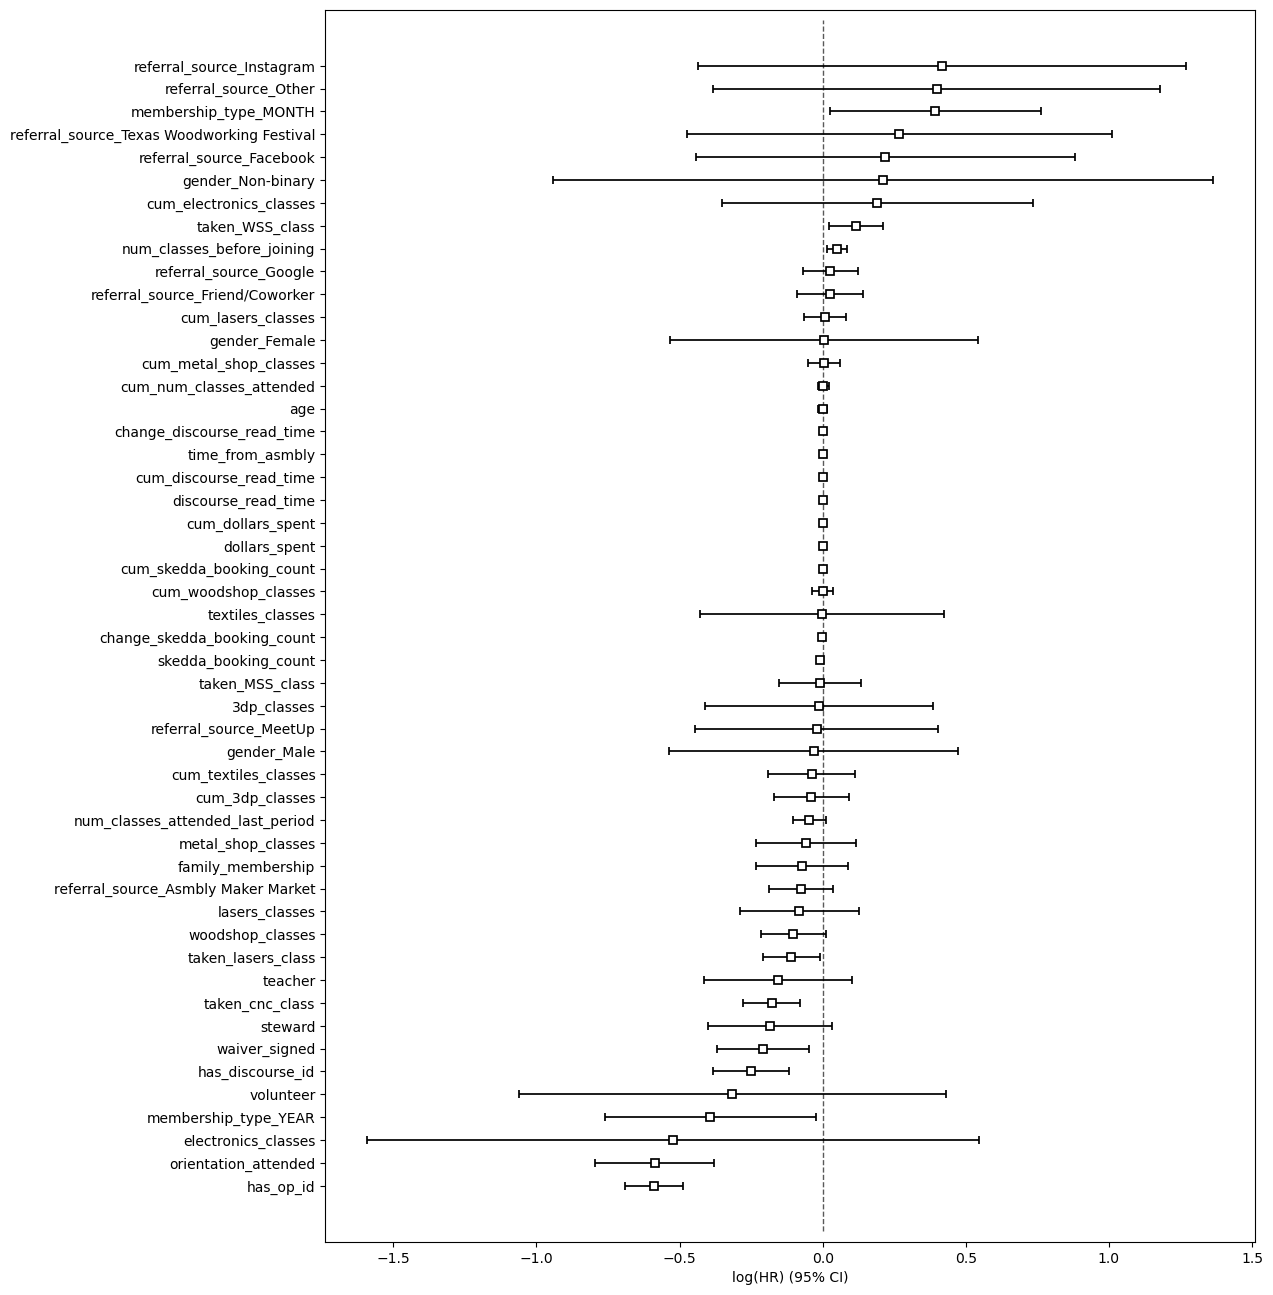

In [6]:
fig, ax = plt.subplots(figsize=(12,16))

ctv.plot(ax=ax)

In [78]:
ctv.print_summary()

<lifelines.CoxTimeVaryingFitter: fitted with 11073 periods, 1247 subjects, 793 events>
         event col = 'membership_cancelled'
         penalizer = 0.05
number of subjects = 1247
 number of periods = 11073
  number of events = 793
partial log-likelihood = -4873.73
  time fit was run = 2024-03-20 16:29:16 UTC

---
                                             coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                          
has_op_id                                   -0.85       0.43       0.06            -0.97            -0.73                 0.38                 0.48
has_discourse_id                            -0.34       0.71       0.08            -0.49            -0.18                 0.61                 0.83
time_from_asmbly                             0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
age                                          0.00       1.00       0.01            -0.02             0.02                 0.98                 1.02
family_membership                           -0.10       0.90       0.10            -0.30             0.09                 0.74                 1.10
waiver_signed                               -0.18       0.84       0.09            -0.36             0.00                 0.70                 1.00
orientation_attended                        -0.66       0.52       0.12            -0.89            -0.44                 0.41                 0.65
taken_MSS_class                              0.02       1.02       0.09            -0.15             0.20                 0.86                 1.22
taken_WSS_class                              0.18       1.20       0.06             0.06             0.29                 1.07                 1.34
taken_cnc_class                             -0.27       0.77       0.06            -0.39            -0.14                 0.68                 0.87
taken_lasers_class                          -0.15       0.86       0.06            -0.27            -0.03                 0.77                 0.97
teacher                                     -0.24       0.78       0.17            -0.58             0.10                 0.56                 1.10
steward                                     -0.28       0.76       0.14            -0.56             0.00                 0.57                 1.00
num_classes_before_joining                   0.08       1.08       0.02             0.04             0.12                 1.04                 1.12
num_classes_attended_last_period            -0.11       0.90       0.03            -0.17            -0.04                 0.84                 0.96
cum_num_classes_attended                     0.00       1.00       0.01            -0.02             0.03                 0.98                 1.03
referral_source_Asmbly Maker Market         -0.10       0.91       0.07            -0.24             0.05                 0.79                 1.05
referral_source_Facebook                     0.26       1.29       0.37            -0.47             0.99                 0.62                 2.68
referral_source_Friend/Coworker              0.04       1.04       0.08            -0.11             0.18                 0.89                 1.20
referral_source_Google                       0.03       1.03       0.07            -0.10             0.16                 0.91                 1.17
referral_source_Instagram                    0.55       1.74       0.47            -0.38             1.48                 0.69                 4.41
referral_source_MeetUp                      -0.02       0.98       0.26            -0.53             0.49                 0.59                 1.63
referral_source_Other                        0.53       1.69       0.44            -0.34             1.39                 0.71   

In [79]:
ctv.baseline_survival_

,baseline survival
1,0.930309
2,0.870670
3,0.810929
4,0.752460
5,0.706613
6,0.677371
7,0.644502
8,0.614224
9,0.592491
10,0.572424


In [80]:
ctv.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
has_op_id,-0.851113,0.426939,0.062526,-0.973662,-0.728565,0.377697,0.482601,0.0,-13.612150,3.391204e-42,137.759182
has_discourse_id,-0.335812,0.714757,0.077621,-0.487946,-0.183679,0.613886,0.832203,0.0,-4.326324,1.516186e-05,16.009193
time_from_asmbly,0.000002,1.000002,0.000029,-0.000055,0.000060,0.999945,1.000060,0.0,0.073776,9.411885e-01,0.087444
age,0.000678,1.000678,0.009414,-0.017772,0.019128,0.982385,1.019312,0.0,0.072030,9.425778e-01,0.085316
family_membership,-0.101803,0.903207,0.100268,-0.298324,0.094717,0.742061,1.099348,0.0,-1.015317,3.099549e-01,1.689870
waiver_signed,-0.178905,0.836185,0.093498,-0.362158,0.004348,0.696172,1.004357,0.0,-1.913462,5.568894e-02,4.166465
orientation_attended,-0.662804,0.515404,0.115784,-0.889737,-0.435871,0.410764,0.646701,0.0,-5.724470,1.037569e-08,26.522217
taken_MSS_class,0.020556,1.020769,0.089426,-0.154715,0.195827,0.856659,1.216317,0.0,0.229869,8.181939e-01,0.289485
taken_WSS_class,0.179424,1.196528,0.058660,0.064452,0.294396,1.066574,1.342316,0.0,3.058695,2.223036e-03,8.813253
